<a href="https://colab.research.google.com/github/shauryasachdev/Deep-Learning/blob/main/Neural_Network_Backward_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# definining inputs and expected output (XOR) truth table
x = np.array([[0,0],[0,1],[1,0],[1,1]]).T     # 2x4 matrix, each column is a training example (notice how you define columns in an array)
d = np.array([0,1,1,0]) # Expected output for XOR (you define them separated by commas)

print('x = {}'.format(x))  # notice how you define the columns
print('d = {}'.format(d))  # pay close attention to how the array is defined (separated by commas)

x = [[0 0 1 1]
 [0 1 0 1]]
d = [0 1 1 0]


In [35]:
def initialize_network_parameters():
  # Network Parameters

  inputSize = 2;            # no. of input neurons (x1, x2)
  hiddenSize = 2;           # no. of hidden neurons
  outputSize = 1;           # no. of output neurons
  lr = 0.1;                 # learning rate
  epochs = 180000;          # no. of training epochs

  # initialize weights and biases within range [-1,1] randomly

  w1 = np.random.rand(hiddenSize, inputSize)*2 - 1;    # weights from input layer to hidden layers
  w2 = np.random.rand(outputSize, hiddenSize)*2 - 1;   # weights from hidden layers to output layer
  b1 = np.random.rand(hiddenSize, 1)*2 - 1;            # bias for hidden layers
  b2 = np.random.rand(outputSize, 1)*2 - 1;            # bias for output layer

  return w1, b1, w2, b2, lr, epochs


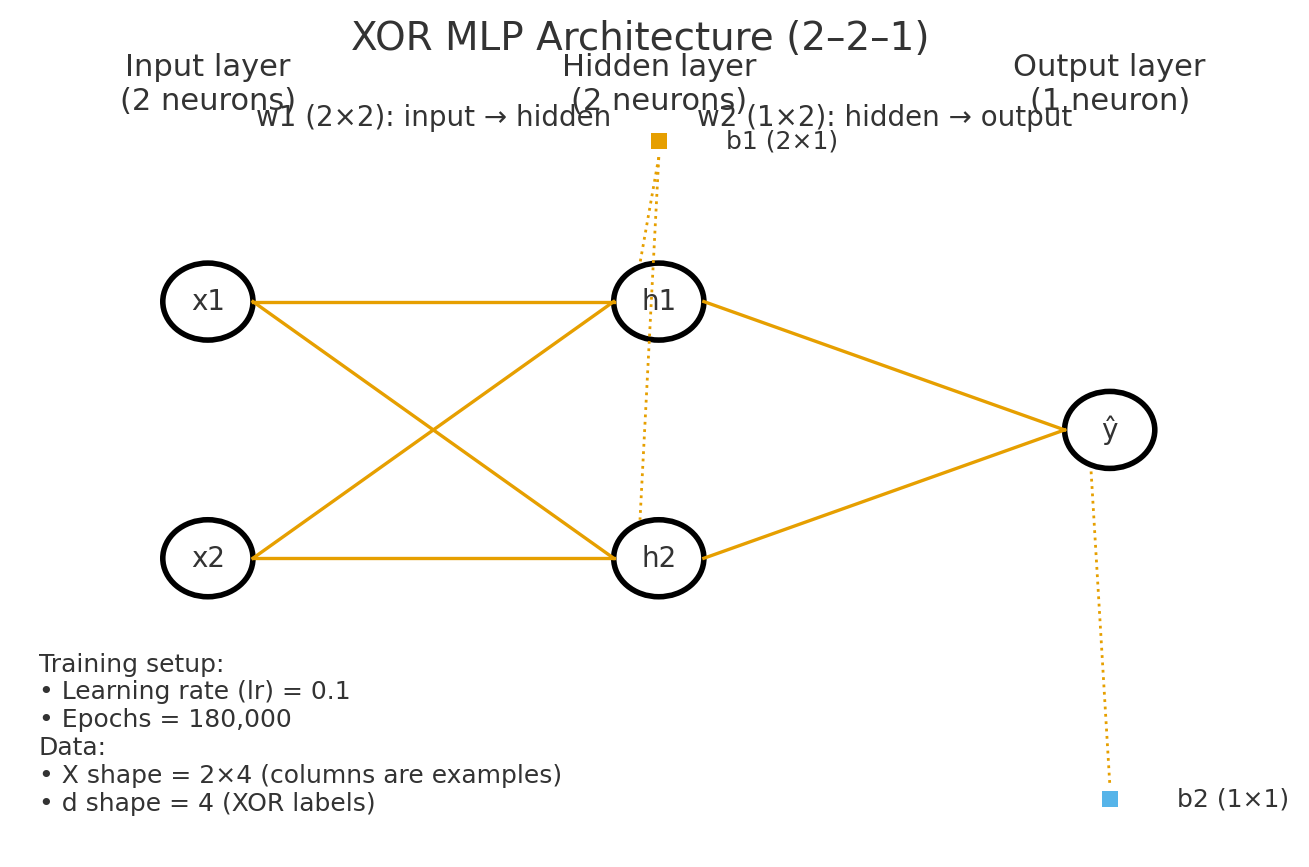



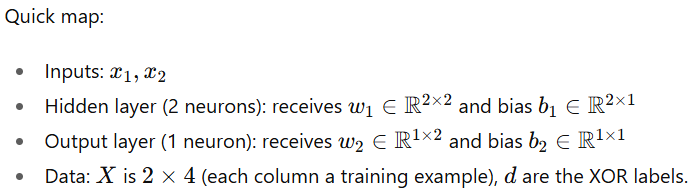


In [36]:
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

error_list = []

for epoch in range(epochs):

  # forward pass

  z1 = np.dot(w1, x) + b1         # w1 = 2x2 dot product with X = 2x4 resulting in z1 (or a1) = 2x4
  a1 = 1 / (1 + np.exp(-z1))

  z2 = np.dot(w2, a1) + b2        # w2 = 1x2 dot product with a1 = 2x4 resulting in z2 (or a2) = 1x4
  a2 = 1 / (1 + np.exp(-z2))

  # back propogation for w2 and b2

  error = d - a2
  da2 = error * (a2 *  (1 - a2))  # derivative of the error wrt to z2 only (d error / d z2  = d error / d a2 * d a2 /d z2)
                                  # for d error / d w2  = d error / d z2 * d z2 / d w2 -> This will come later
  dz2 = da2

  # updating the weights and biasis

  w2 += lr * np.dot(dz2,a1.T)    # see, now a1 comes into the picture and the full derivative of d error / d w2 is complete
  b2 += lr * np.sum(dz2, axis = 1, keepdims = True)

  # back propogation for w1 and b1

  da1 = np.dot(w2.T,dz2)         # The rest of the terms will come later
  dz1 = da1 * (a1 * (1 - a1))            # see, now it comes here

  # updating the weights and biasis

  w1 += lr * np.dot(dz2, x.T)
  b1 += lr * np.sum(dz1, axis=1, keepdims=True)

  if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


Epoch: 9999, Average error: 0.17358
Epoch: 19999, Average error: 0.09721
Epoch: 29999, Average error: 0.07391
Epoch: 39999, Average error: 0.06161
Epoch: 49999, Average error: 0.05378
Epoch: 59999, Average error: 0.04826
Epoch: 69999, Average error: 0.04411
Epoch: 79999, Average error: 0.04085
Epoch: 89999, Average error: 0.03821
Epoch: 99999, Average error: 0.03601
Epoch: 109999, Average error: 0.03414
Epoch: 119999, Average error: 0.03253
Epoch: 129999, Average error: 0.03112
Epoch: 139999, Average error: 0.02988
Epoch: 149999, Average error: 0.02877
Epoch: 159999, Average error: 0.02778
Epoch: 169999, Average error: 0.02688
Epoch: 179999, Average error: 0.02606


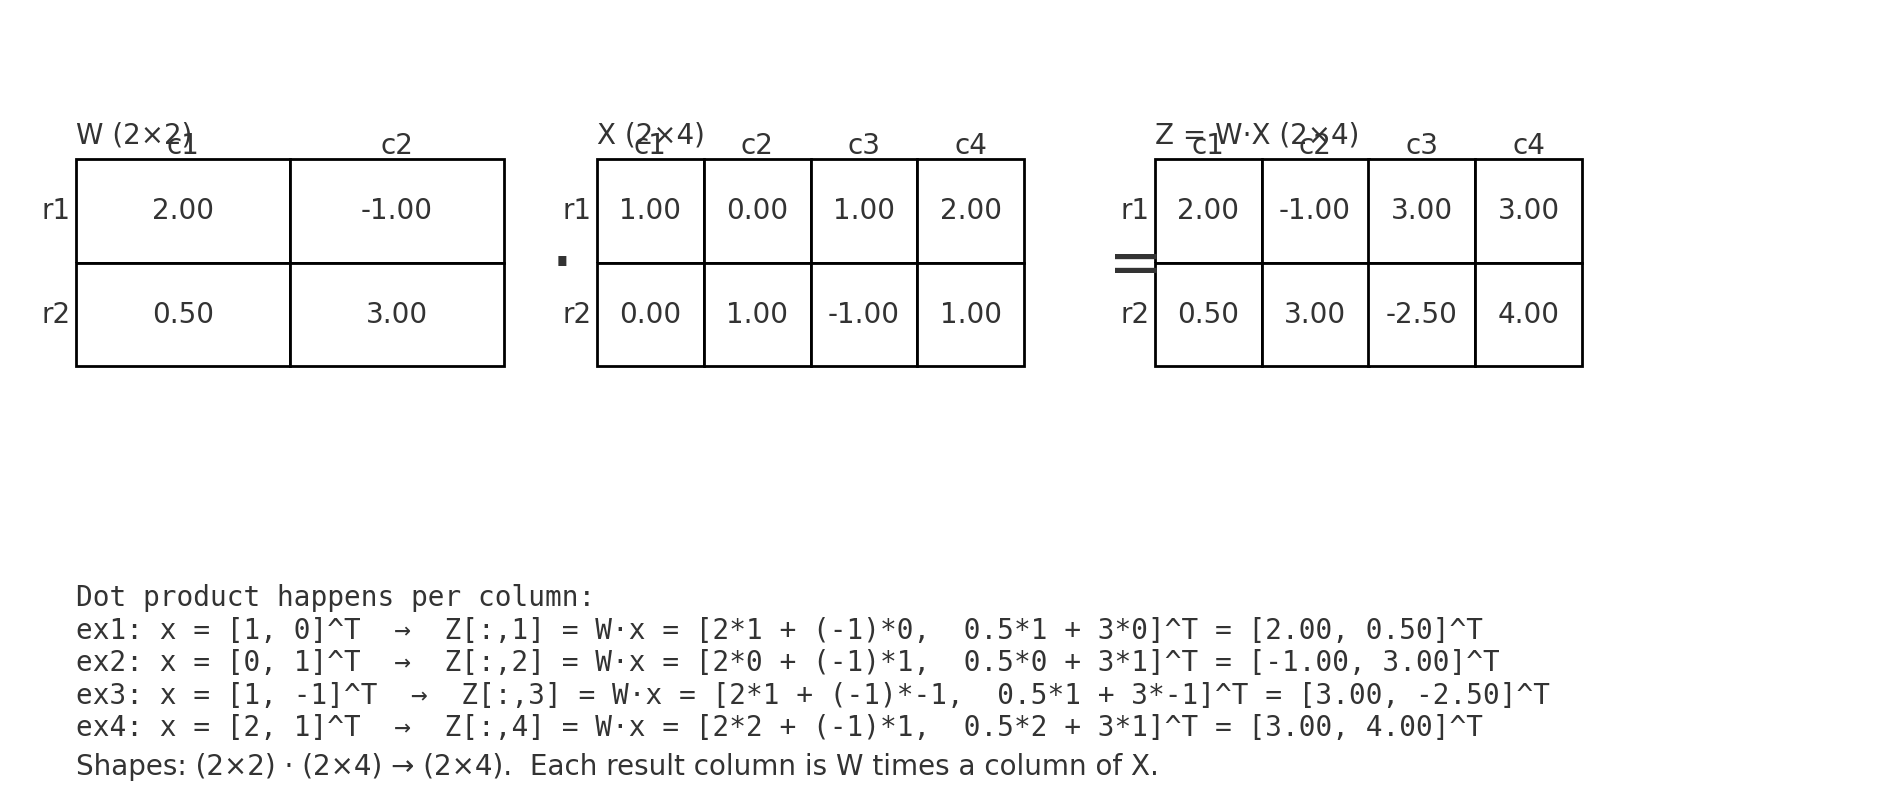
image.png

Here, there is a dot product of a 2x2 w1 matrix with the 2x4 X=input matrix which results in a 2x4 z1 (or a1) matrix

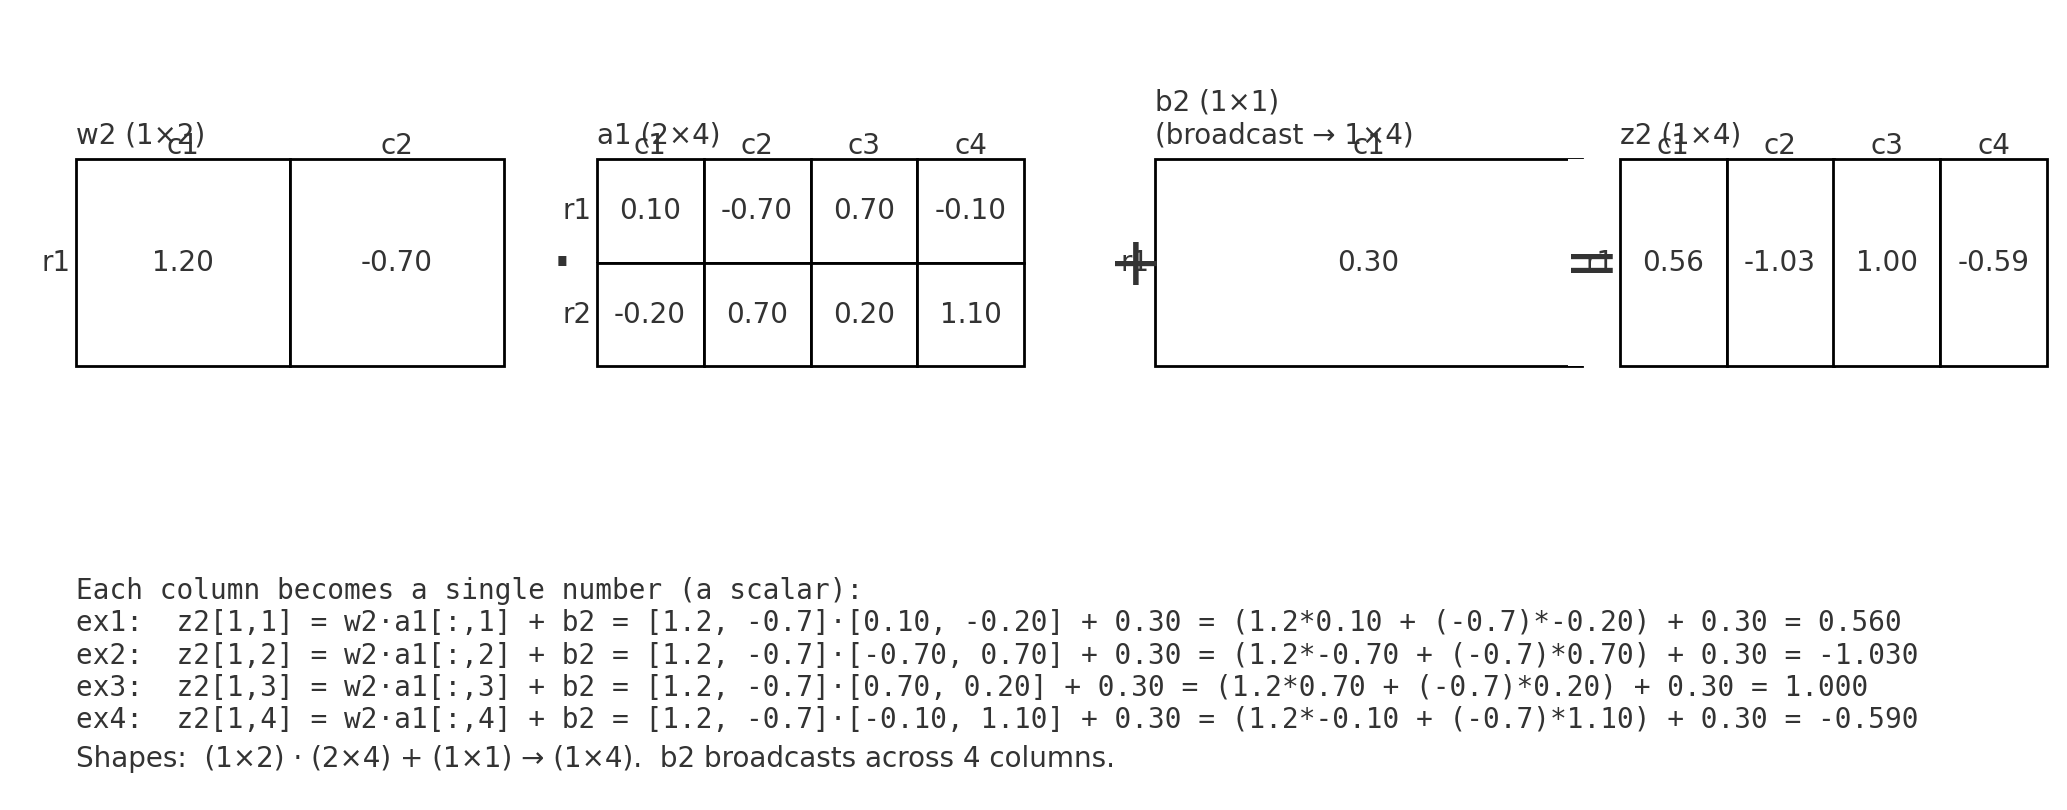

Here is ther a dot product of w2 which is 1x2 matrix with a1 wichi is a 2x4 matrix, resulting in 1x4 z2 (or a2 matrix).

Now, the results of the output a2 (1x4) matrix can be compared to the actual output or the ground truth of the output (1x4) matrix and the error can be calculated.

 See the derivatives in the notes to understand how chain durle delivatives are implemented.

In [37]:
# Testing the trained model

z1 =  np.dot(w1, x) + b1
a1 = 1 / (1 + np.exp(-z1))

z2 = np.dot(w2, a1) + b2
a2 = 1 / (1 + np.exp(-z2))

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))



Final output after training: [[0.02471542 0.97348508 0.9735021  0.02651464]]
Ground truth [0 1 1 0]
Error after training: [[-0.0247155   0.026515    0.02649798 -0.02651472]]
Average error: 0.02606


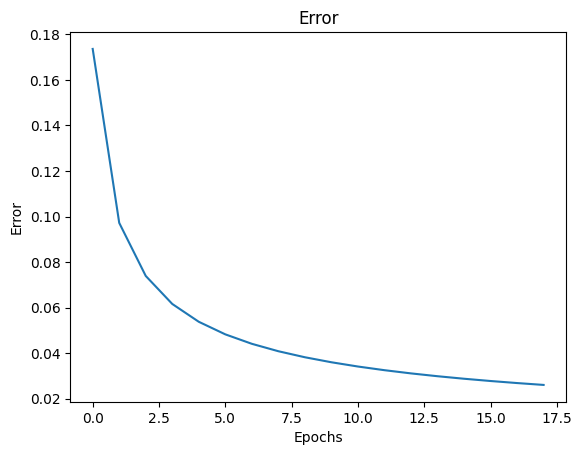

In [38]:
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()